In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
import seaborn as sns
sns.set(style="white")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WeatherData.csv')
df = df.drop(columns = "Unnamed: 0")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 9 columns):
Date                 5768 non-null object
Temperature          5768 non-null float64
PrecipIntensity      5768 non-null float64
PrecipProbability    5768 non-null float64
Pressure             5766 non-null float64
Sunlight             5768 non-null float64
DewPoint             5768 non-null float64
County               5768 non-null object
State                5768 non-null object
dtypes: float64(6), object(3)
memory usage: 405.6+ KB


In [3]:
# Aggregate daily weather to get monly level data
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].apply(lambda x: x.year)
df['month'] = df['Date'].apply(lambda x: x.month) 

g = df.groupby(["year", "month"], as_index = False)
monthly_averages = g.mean()
monthly_averages.head()

,year,month,Temperature,PrecipIntensity,PrecipProbability,Pressure,Sunlight,DewPoint
0,2015,2,56.179109,0.001829,0.037954,1017.687192,0.829063,45.449196
1,2015,3,62.089934,0.000198,0.008777,1018.349245,1.456156,44.899359
2,2015,4,62.803194,0.001024,0.019411,1014.785632,2.108160,40.638974
3,2015,5,65.312317,0.000192,0.010291,1012.310960,2.470138,45.828732
4,2015,6,77.986806,0.000064,0.003394,1010.379528,2.798825,49.899064


# Preliminary Analysis

In [4]:
monthly_averages.describe()

,year,month,Temperature,PrecipIntensity,PrecipProbability,Pressure,Sunlight,DewPoint
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2016.916667,3.916667,62.664633,0.001525,0.040201,1015.287191,1.846767,45.551465
std,1.411649,1.411649,8.426057,0.001822,0.046036,3.101465,0.717014,3.742832
min,2015.000000,2.000000,47.888342,0.000009,0.000911,1010.379528,0.782600,35.168106
25%,2016.000000,3.000000,55.865663,0.000181,0.008044,1012.411190,1.323562,44.440662
50%,2017.000000,4.000000,62.446564,0.000817,0.017230,1015.583084,1.996014,45.862804
75%,2018.000000,5.000000,67.299932,0.001870,0.051171,1017.485349,2.486378,48.056898
max,2019.000000,6.000000,77.986806,0.006341,0.155482,1021.667690,2.827582,52.658535


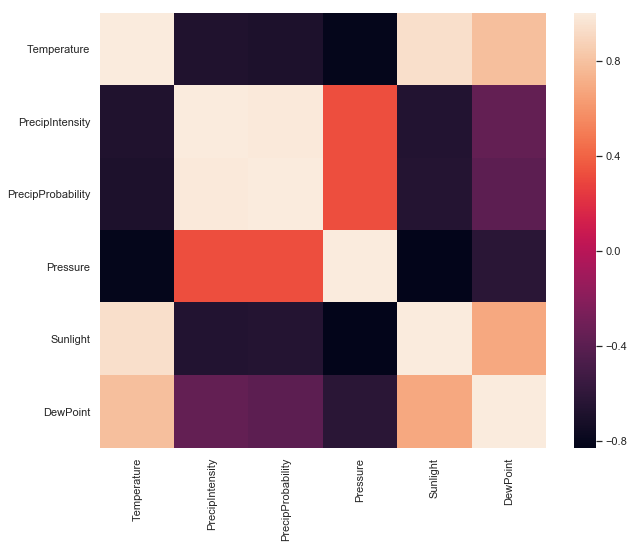

In [5]:
# Correlation plot
from matplotlib import pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = monthly_averages[['Temperature','PrecipIntensity','PrecipProbability','Pressure','Sunlight','DewPoint']].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Observation:**
* Precipitation Intensity and Precipitation Probability are highly correlated.
* Temperature and Amount of Direct Sunlight is highly correlated.
* Pressure is negatively correlated with Temperature and Sunlight

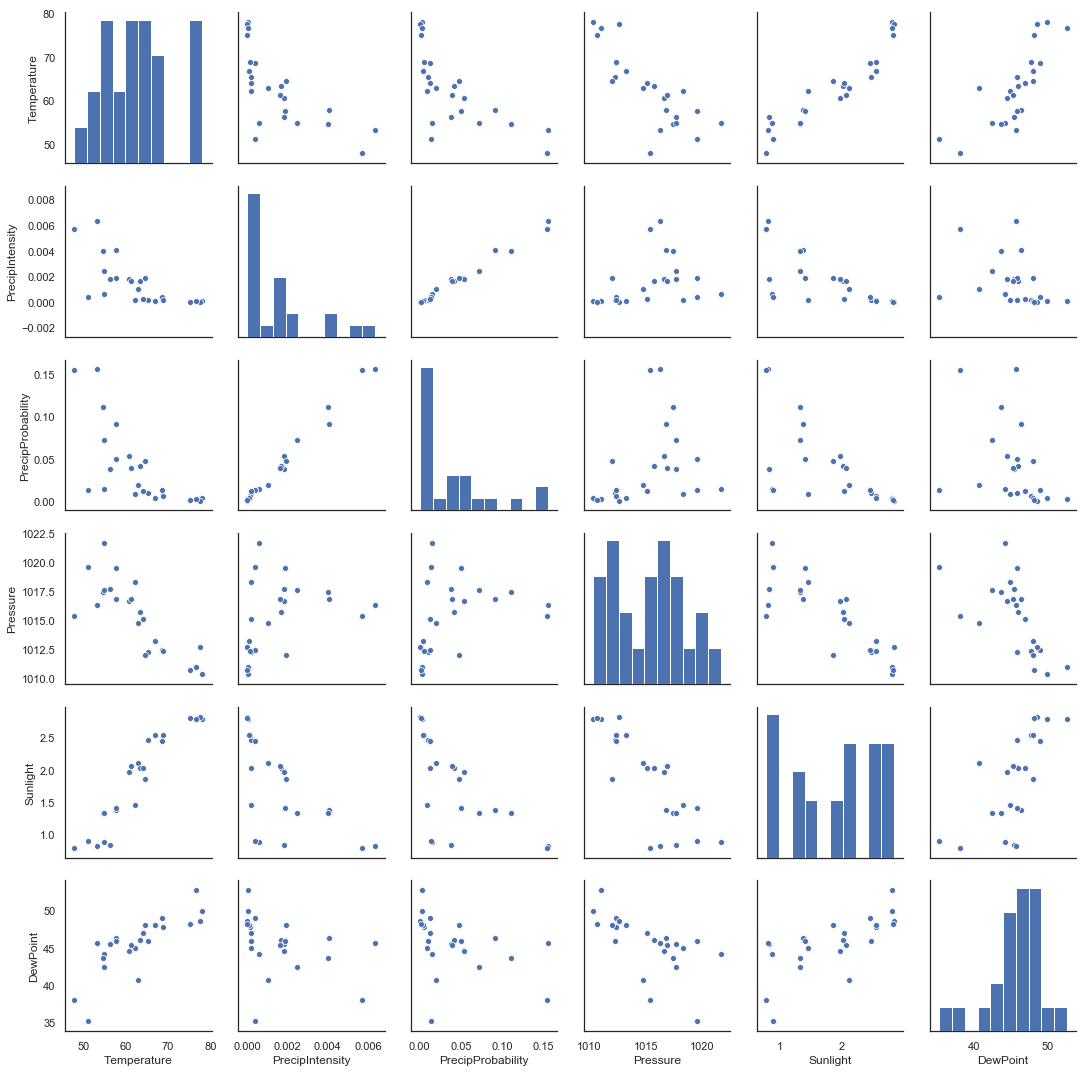

In [6]:
sns.pairplot(monthly_averages[['Temperature','PrecipIntensity','PrecipProbability','Pressure','Sunlight','DewPoint']])

# Observe each Weather Variable

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
dfMonthly = df
dfMonthly.Date = pd.to_datetime(dfMonthly.Date)
dfMonthly = dfMonthly.resample('M', on='Date').mean()
dfMonthly = dfMonthly.dropna()
dfMonthly = dfMonthly.reset_index()
dfMonthly.head()

,Date,Temperature,PrecipIntensity,PrecipProbability,Pressure,Sunlight,DewPoint,year,month
0,2015-02-28,56.179109,0.001829,0.037954,1017.687192,0.829063,45.449196,2015.0,2.0
1,2015-03-31,62.089934,0.000198,0.008777,1018.349245,1.456156,44.899359,2015.0,3.0
2,2015-04-30,62.803194,0.001024,0.019411,1014.785632,2.108160,40.638974,2015.0,4.0
3,2015-05-31,65.312317,0.000192,0.010291,1012.310960,2.470138,45.828732,2015.0,5.0
4,2015-06-30,77.986806,0.000064,0.003394,1010.379528,2.798825,49.899064,2015.0,6.0


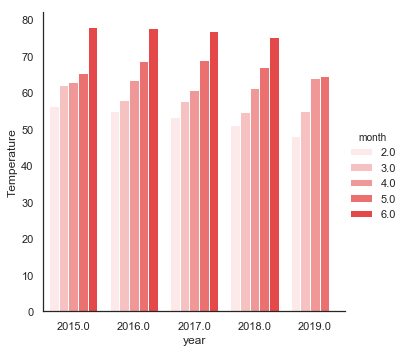

In [8]:
with sns.light_palette("red"):
    sns.catplot(x="year", y="Temperature", hue="month", data=dfMonthly, kind = 'bar')

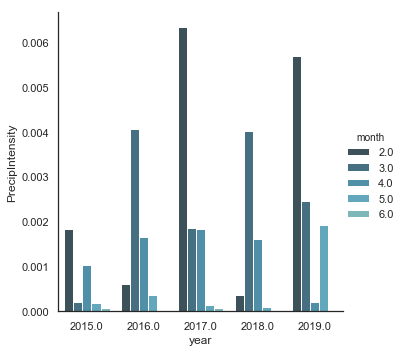

In [9]:
with sns.color_palette("GnBu_d"):
    sns.catplot(x="year", y="PrecipIntensity", hue="month", data=dfMonthly, kind = 'bar')

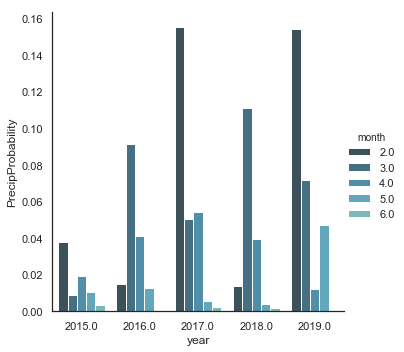

In [10]:
with sns.color_palette("GnBu_d"):
    sns.catplot(x="year", y="PrecipProbability", hue="month", data=dfMonthly, kind = 'bar')

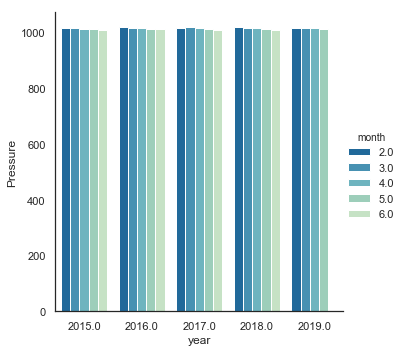

In [11]:
with sns.color_palette("GnBu_r"):
    sns.catplot(x="year", y="Pressure", hue="month", data=dfMonthly, kind = 'bar')

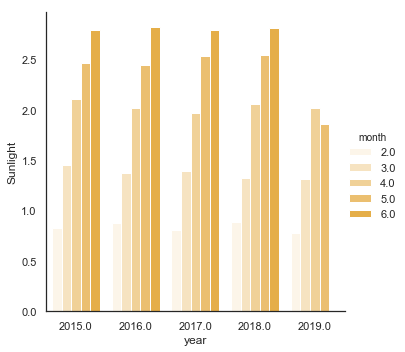

In [12]:
with sns.light_palette("orange"):
    sns.catplot(x="year", y="Sunlight", hue="month", data=dfMonthly, kind = 'bar')

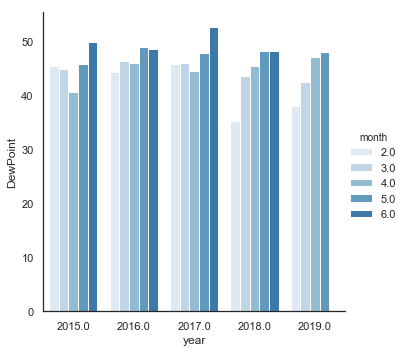

In [13]:
with sns.color_palette("Blues"):
    sns.catplot(x="year", y="DewPoint", hue="month", data=dfMonthly, kind = 'bar')

# Detect Outliers

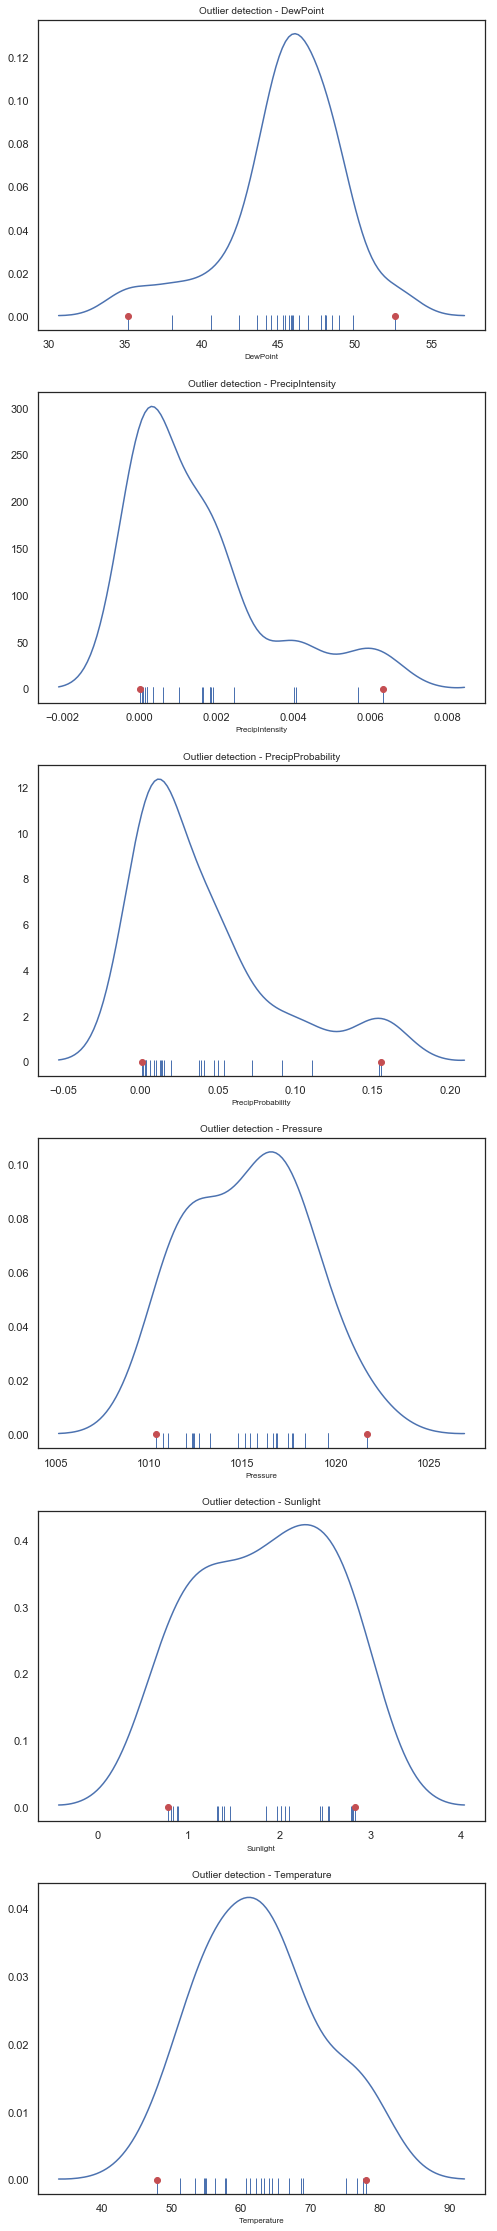

In [14]:
def percentile_based_outlier(data, threshold=95):
      diff = (100 - threshold) / 2
      minval, maxval = np.percentile(data, [diff, 100 - diff])
      return (data < minval) | (data > maxval)

col_names = ['DewPoint','PrecipIntensity', 'PrecipProbability', 'Pressure', 'Sunlight', 'Temperature']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  x = monthly_averages[col_val][:1000]
  sns.distplot(x, ax=ax[i], rug=True, hist=False)
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

We detect outliers in DuePoint, PrecipitationIntensity and PrecipitationProbability.